In [13]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()


In [16]:
file = pd.DataFrame(iris.data, columns=iris.feature_names)
file.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
file['target'] = iris.target

In [28]:
from matplotlib import pyplot as plt
file0 = file[file['target'] == 0]
file1 = file[file['target'] == 1]
file2 = file[file['target'] == 2]

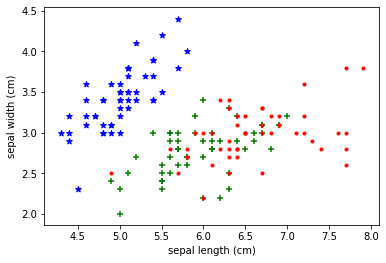

In [36]:
plt.scatter(file1['sepal length (cm)'], file1['sepal width (cm)'], color='green', marker='+')
plt.scatter(file0['sepal length (cm)'], file0['sepal width (cm)'], color='blue', marker='*')
plt.scatter(file2['sepal length (cm)'], file2['sepal width (cm)'], color='red', marker='.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

                  
plt.show()
                  

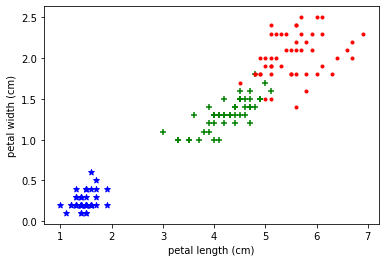

In [38]:
plt.scatter(file1['petal length (cm)'], file1['petal width (cm)'], color='green', marker='+')
plt.scatter(file0['petal length (cm)'], file0['petal width (cm)'], color='blue', marker='*')
plt.scatter(file2['petal length (cm)'], file2['petal width (cm)'], color='red', marker='.')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
                  
plt.show()
                  

In [39]:
from sklearn.model_selection import train_test_split
X = file.drop(['target'], axis=1)
Y = file['target']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [42]:
len(x_train)

120

In [43]:
len(x_test)

30

In [45]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
nfolds = 10


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
grid_search.fit(x_train, y_train)

In [48]:
  grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [49]:
model = SVC(C = 1, gamma = 0.1)

In [50]:
model.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
model.score(x_test, y_test)

1.0

In [55]:
from sklearn.metrics import confusion_matrix 

In [57]:
y_pred = model.predict(x_test)

In [58]:
cm = confusion_matrix(y_test, y_pred)

In [59]:
cm

array([[15,  0,  0],
       [ 0,  7,  0],
       [ 0,  0,  8]], dtype=int64)